# TA3 - Identificação de objetos na imagem com Histograma

## Importação de bibliotecas e imagens

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import glob

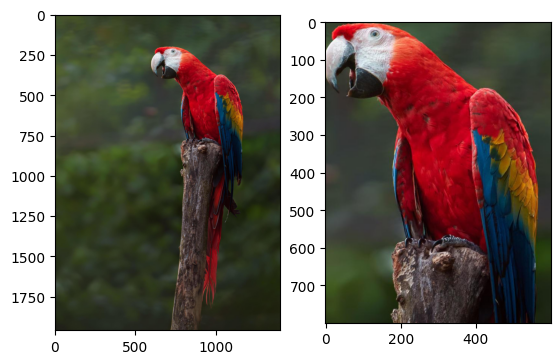

In [19]:
original = cv.imread('./images/arara.jpg')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
original_hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)

roi = original[200:1000, 600:1200]
roi_hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(original)
axes[1].imshow(roi)

## Criação do histograma

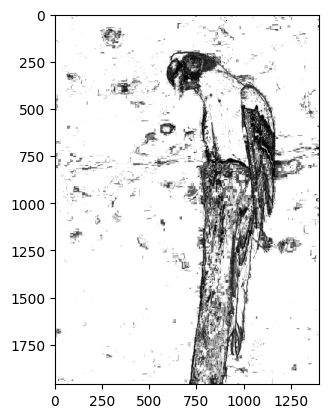

In [21]:
roi_hist = cv.calcHist([roi_hsv], [0,1], None, [180,256], [0, 180, 0, 256])
mask = cv.calcBackProject([original_hsv], [0,1], roi_hist, [0,180,0,256], 1)
plt.imshow(mask, 'gray')

## Comparação de Histogramas

In [18]:
comp1 = cv.compareHist(obj_hist, scene_hist, cv.HISTCMP_INTERSECT)
comp2 = cv.compareHist(obj_hist, scene_hist2, cv.HISTCMP_INTERSECT)

print(f'comp1 = {comp1}, comp2 = {comp2}')
if(comp1 > comp2):
    print('CENA 1 É MAIS PRÓXIMA!')
else:
    print('CENA 2 É MAIS PRÓXIMA')

comp1 = 2.779415307993986, comp2 = 1.887841275140545
CENA 1 É MAIS PRÓXIMA!
